# 第一问

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lightgbm import LGBMClassifier

from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import StackingCVClassifier

from sklearn.svm import SVC
from sklearn import metrics

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier as ada
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier as RF

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score,precision_score,recall_score

In [7]:
#  Voting
data = pd.read_csv('D://workspace//mathematical_modeling//test_2//solver//excel//extract//1//第一问特征提取.csv',
                   encoding='utf-8',
                   index_col='企业代号')
# for i in range(len(data)):
#     a = 'E' + str(i + 1)
#     # One-hot
#     if data.loc[a, '是否违约'] == '否':
#         data.loc[a, '违约'] = 0
#     else:
#         data.loc[a, '违约'] = 1

x = data.iloc[:, :-3].values
y = data.iloc[:, -1].values
# data.iloc[:, -1]
data

,销-进金额,增值税,销1,销2,销3,销4,进1,进2,进3,进4,...,比例变化,是否扭亏为盈利,是否变为亏损,下属部门,分公司,公司,个体经营,评级,信誉评级,是否违约
企业代号,,,,,,,,,,,,,,,,,,,,,
E1,-1.898184e+09,0.000000e+00,179,51,51,71,332,74,27,3,...,1.720614,0,0,0,0,1,0,0,A,0
E2,4.262976e+08,2.826162e+07,1147,268,121,43,2424,780,314,103,...,2.197674,0,0,0,0,1,0,0,A,0
E3,5.149872e+08,8.856227e+07,48,48,25,14,386,103,58,23,...,0.516353,0,0,0,1,0,0,2,C,0
E4,1.511803e+09,2.543300e+08,16,10,0,0,94,21,13,2,...,0.053642,0,0,0,0,1,0,2,C,0
E5,6.915274e+05,5.489589e+05,16,15,2,0,324,47,19,2,...,85.227087,0,0,0,0,1,0,1,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E119,-1.841203e+05,0.000000e+00,12,1,1,0,7,6,2,2,...,6.999117,0,0,0,0,1,0,3,D,1
E120,1.624161e+05,3.780940e+03,6,0,0,0,13,3,0,0,...,1.139033,0,0,0,0,1,0,3,D,1
E121,-9.720242e+05,0.000000e+00,110,6,0,0,7,2,2,0,...,-0.075122,1,0,0,0,1,0,3,D,1


In [12]:
print(sum(y == 0))
print(sum(y == 1))


96
27


In [17]:
# init model

# lightGBM适合较大数据集的样本
# 而对于较小的数据集(<10000条记录)，lightGBM可能不是最佳选择。所以，如果进行调优lightgbm参数，这可能没有帮助。
lgb = LGBMClassifier(learning_rate=0.001,n_estimators=50,objective='binary',
                           boosting_type='gbdt',
                           num_leaves=2**5,
                           max_depth=5,reg_alpha=0.5,reg_lambda=0.5,
                           metric='auc',subsample=0.75)
LR = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Ada = ada(algorithm='SAMME', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=30)
GBDT = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.7, loss='exponential', max_depth=3,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=25,
                           n_iter_no_change=None,
                           random_state=30, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
svc = SVC(C=0.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=20, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

rf = RF(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)
#cv：设定交叉验证折数
sclf = StackingCVClassifier(classifiers=[Ada, GBDT, LR,rf],
                            use_probas=True,
                            meta_classifier=svc,
                            random_state=30,
                            cv=5)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=30)

# (x - u) / s  归一化
tranfer = StandardScaler()
x = tranfer.fit_transform(x)
x_train = tranfer.transform(x_train)
x_test = tranfer.transform(x_test)

metric_xlsx = {}
weight = []
for clf, label in zip(
    [LR, Ada, GBDT, svc, rf, sclf, lgb],
    ['LR', 'Ada', 'GBDT', 'svc', 'rf', 'StackingClassifier', 'LGBMClassifier'
     ]):
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)

    tem_1 = [
        metrics.accuracy_score(y_train, clf.predict(x_train)),
        metrics.accuracy_score(y_test, y_predict),
        precision_score(y_test, y_predict),
        recall_score(y_test, y_predict),
        metrics.roc_auc_score(y_test,clf.predict_proba(x_test)[:, 1]),
        metrics.f1_score(y_test, y_predict),
    ]

    metric_xlsx[label] = tem_1
    tem = metrics.accuracy_score(y_train, clf.predict(x_train))
    # tem = metrics.accuracy_score(y, clf.predict(x))
    weight.append(tem)
    # print('{}在预测集模型的准确率为：\n'.format(label), metrics.accuracy_score(y_test, y_predict))
    # print('{}在训练集模型的准确率为：\n'.format(label), metrics.accuracy_score(y_train, clf.predict(x_train)))
    # print('{}的综合准确率为：\n'.format(label), metrics.accuracy_score(y, clf.predict(x)))
    # print('{}的ROC面积为：'.format(label), metrics.roc_auc_score(y, clf.predict(x)))
    # print('---'*8)
data2 = pd.DataFrame(data=metric_xlsx,
                     index=[
                         'train_Accuracy', 'test_Accuracy', 'Precision',
                         'Recall', 'AUC', 'f1'
                     ]).T
data2

c:\Miniconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Miniconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,train_Accuracy,test_Accuracy,Precision,Recall,AUC,f1
LR,0.902174,0.838710,0.000000,0.00,0.750000,0.000000
Ada,0.913043,0.903226,0.666667,0.50,0.879630,0.571429
GBDT,1.000000,0.806452,0.333333,0.50,0.824074,0.400000
svc,0.978261,0.870968,0.000000,0.00,0.546296,0.000000
rf,1.000000,0.870968,0.500000,0.50,0.884259,0.500000
StackingClassifier,0.902174,0.903226,1.000000,0.25,0.601852,0.400000
LGBMClassifier,0.750000,0.870968,0.000000,0.00,0.819444,0.000000


In [26]:
print(weight,len(weight))

# 软投票
# w = weight/sum(weight)

vote2 = VotingClassifier(estimators=[('LR', LR), ('Ada', Ada), ('GBDT', GBDT),
                                     ('SVC', svc), ('rf', rf),
                                     ('StackingClassifier', sclf),
                                     ('LGBMClassifier',lgb)],
                         voting='soft',
                         weights=weight)
vote2.fit(x_train,y_train)
y_predict = vote2.predict(x)

print('{}在预测集模型的准确率为：\n'.format('soft Voting'),
      metrics.accuracy_score(y, y_predict))
print('{}在训练集模型的准确率为：\n'.format('soft Voting'),
      metrics.accuracy_score(y_train, vote2.predict(x_train)))
print('soft voting的综合表现:\n', metrics.accuracy_score(y, vote2.predict(x)))
print()
print('soft voting的ROC面积：\n', roc_auc_score(y, vote2.predict(x)))



[0.9021739130434783, 0.9130434782608695, 1.0, 0.9782608695652174, 1.0, 0.9021739130434783, 0.75] 7
soft Voting在预测集模型的准确率为：
 0.967479674796748
soft Voting在训练集模型的准确率为：
 0.9891304347826086
soft voting的综合表现:
 0.967479674796748

soft voting的ROC面积：
 0.9259259259259259


In [28]:
P = vote2.predict_proba(x)
df = pd.DataFrame(data={'违约概率': P[:,1],
                        '信誉评级': data['信誉评级']})
df.to_csv('./excel/extract/1/违约风险.csv',encoding='gbk')
df.head()

,违约概率,信誉评级
企业代号,,
E1,0.152202,A
E2,0.126412,A
E3,0.109017,C
E4,0.118611,C
E5,0.143692,B


## ROC曲线的绘制

AUC的值为： 0.9259259259259259


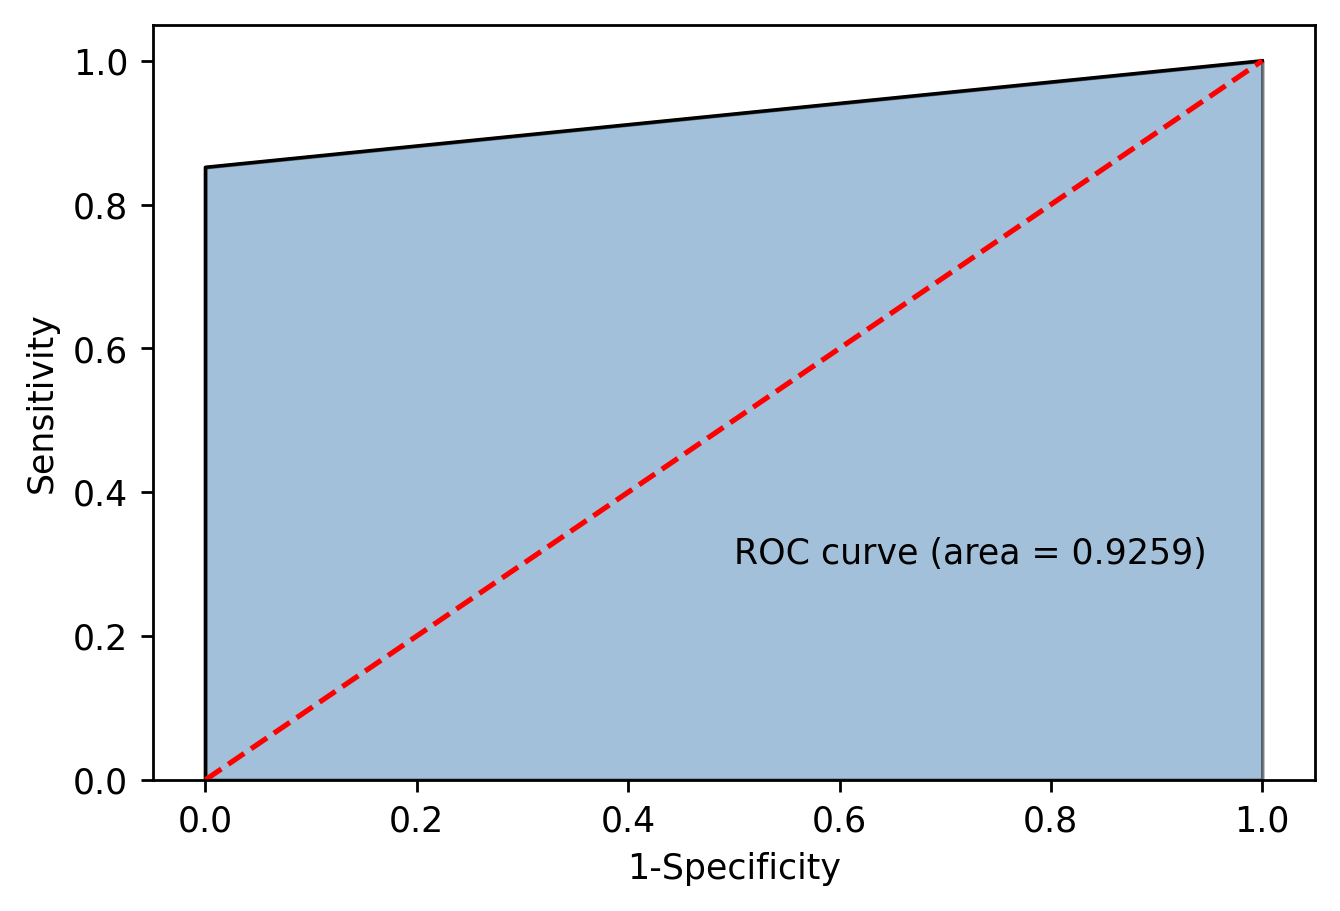

In [37]:
fpr, tpr, threshold = metrics.roc_curve(y, y_predict)
# 计算AUC的值
roc_auc = metrics.auc(fpr,tpr)

#绘制面积图
plt.figure(figsize=(6,4),dpi=250)
plt.stackplot(fpr,tpr,color='steelblue',alpha=0.5,edgecolor='black')
# 添加边际线
plt.plot(fpr,tpr,color='black',lw=1)
# 添加对角线
plt.plot([0,1],[0,1],color='red',linestyle='--')
# 添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.4f)' % roc_auc,fontsize=10)
# 添加x轴坐标与y轴坐标
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

fpr,tpr,threshold = metrics.roc_curve(y,y_predict)
# 计算AUC的值
print('AUC的值为：',roc_auc)
# plt.savefig('./latex/img/1/AUC.png')
plt.show()

In [ ]:
df['信誉评级'] = data['信誉评级'].reset_index()['信誉评级']
df.head()

In [ ]:
aver_A =0
A_aver = sum(df[df['信誉评级']=='A']['违约概率'])/len(df[df['信誉评级']=='A']['违约概率'])
B_aver = sum(df[df['信誉评级']=='B']['违约概率'])/len(df[df['信誉评级']=='B']['违约概率'])
C_aver = sum(df[df['信誉评级']=='C']['违约概率'])/len(df[df['信誉评级']=='C']['违约概率'])
D_aver = sum(df[df['信誉评级']=='D']['违约概率'])/len(df[df['信誉评级']=='D']['违约概率'])
da = {'A企业违约风险':A_aver,'B企业违约风险':B_aver,'C企业违约风险':C_aver,'D企业违约风险':D_aver}
da1 = pd.DataFrame(data=da,index=[0])

da1.to_csv('./excel/result/1/平均违约风险最终结果.csv', encoding='gbk')
da1.head()
